### Model performance measurement

#### Confusion Matrix

In [1]:
from sklearn.metrics import confusion_matrix

In [2]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
(tn, fp, fn, tp)

(0, 2, 1, 1)

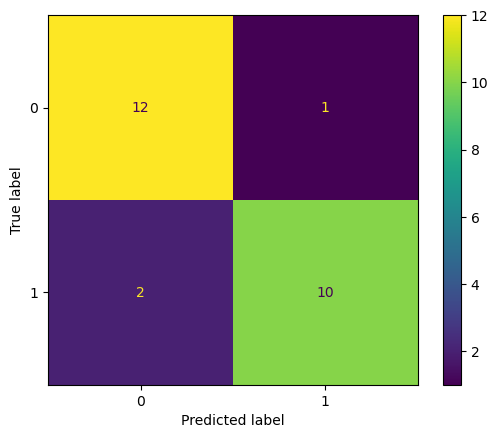

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()

plt.show()


#### F1, Accuracy, Recall, AUC and Precision scores

In [4]:
from sklearn.metrics import f1_score

y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

print(f"Macro f1 score: {f1_score(y_true, y_pred, average='macro')}")

print(f"Micro F1: {f1_score(y_true, y_pred, average='micro')}")

print(f"Weighted Average F1: {f1_score(y_true, y_pred, average='weighted')}")

print(f"F1 No Average: {f1_score(y_true, y_pred, average=None)}")

y_true = [0, 0, 0, 0, 0, 0]
y_pred = [0, 0, 0, 0, 0, 0]
f1_score(y_true, y_pred, zero_division=1)

# multilabel classification
y_true = [[0, 0, 0], [1, 1, 1], [0, 1, 1]]
y_pred = [[0, 0, 0], [1, 1, 1], [1, 1, 0]]
print(f"F1 No Average: {f1_score(y_true, y_pred, average=None)}")


Macro f1 score: 0.26666666666666666
Micro F1: 0.3333333333333333
Weighted Average F1: 0.26666666666666666
F1 No Average: [0.8 0.  0. ]
F1 No Average: [0.66666667 1.         0.66666667]


In [5]:
 from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)

0.5

In [6]:
from sklearn.metrics import precision_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
precision_score(y_true, y_pred, average='macro')

0.2222222222222222

In [7]:
from sklearn.metrics import recall_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
recall_score(y_true, y_pred, average='macro')

0.3333333333333333

In [8]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
X, y = load_breast_cancer(return_X_y=True)
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
roc_auc_score(y, clf.predict_proba(X)[:, 1])


0.9946223772527879

In [10]:
#multiclass case
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(solver="liblinear").fit(X, y)
roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')

0.9913333333333334

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

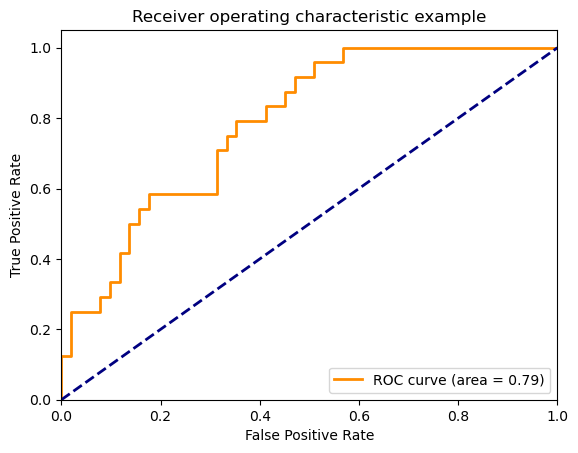

In [12]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import log_loss
log_loss(["spam", "ham", "ham", "spam"], [[.1, .9], [.9, .1], [.8, .2], [.35, .65]])

### Regression metrics

#### RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

#### MAE

In [ ]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

#### r squared

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_true, y_pred)

# Changing parameters for the logistic Regression models

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Load the dataset
X, y = load_breast_cancer(return_X_y=True)

# Original Logistic Regression Model
clf_original = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
original_auc = roc_auc_score(y, clf_original.predict_proba(X)[:, 1])

# Changing C parameter and observing AUC
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
auc_scores = []

for C_val in C_values:
    clf = LogisticRegression(solver="liblinear", random_state=0, C=C_val).fit(X, y)
    auc = roc_auc_score(y, clf.predict_proba(X)[:, 1])
    auc_scores.append(auc)

original_auc, auc_scores


(0.9946223772527879,
 [0.9750541726124413,
  0.9847391786903441,
  0.9914116590032238,
  0.9946223772527879,
  0.995362295861741,
  0.9952037418741081])

In [14]:
from sklearn.metrics import r2_score

# Calculate R2 scores for different values of C
r2_scores = []

for C_val in C_values:
    clf = LogisticRegression(solver="liblinear", random_state=0, C=C_val).fit(X, y)
    predicted_probs = clf.predict_proba(X)[:, 1]
    r2 = r2_score(y, predicted_probs)
    r2_scores.append(r2)

r2_scores


[0.7680304391280153,
 0.7998796203152876,
 0.8403953612543716,
 0.8806252029801551,
 0.9019994917707855,
 0.9035235932337875]

In [15]:
import pandas as pd

# Creating a DataFrame to display the results in a table format
results_df = pd.DataFrame({
    'C': C_values,
    'AUC': auc_scores,
    'R2': r2_scores
})

results_df


,C,AUC,R2
0,0.001,0.975054,0.768030
1,0.010,0.984739,0.799880
2,0.100,0.991412,0.840395
3,1.000,0.994622,0.880625
4,10.000,0.995362,0.901999
5,100.000,0.995204,0.903524


In [18]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, r2_score

# Dataset used for OneVsRestClassifier in the provided snippets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output for multi-class classification
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Splitting the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.5, random_state=0)

# Lists to store results
ovr_auc_scores = []
ovr_r2_scores = []

for C_val in C_values:
    # Define and train OneVsRestClassifier model with SVC
    classifier = OneVsRestClassifier(svm.SVC(kernel="linear", C=C_val, random_state=0, probability=True))
    y_score = classifier.fit(X_train, y_train).decision_function(X_test)
    
    # Calculate AUC for each class
    auc_list = []
    for i in range(n_classes):
        auc_val = roc_auc_score(y_test[:, i], y_score[:, i])
        auc_list.append(auc_val)
    avg_auc = sum(auc_list) / n_classes

    # Calculate R2 using the decision function scores
    r2 = r2_score(y_test.ravel(), y_score.ravel())
    
    ovr_auc_scores.append(avg_auc)
    ovr_r2_scores.append(r2)

# Creating a DataFrame to display the results in a table format for OneVsRestClassifier
ovr_results_df = pd.DataFrame({
    'C': C_values,
    'Average AUC': ovr_auc_scores,
    'R2': ovr_r2_scores
})

ovr_results_df


,C,Average AUC,R2
0,0.001,0.894786,-6.393465
1,0.010,0.894317,-4.361109
2,0.100,0.899441,-14.089300
3,1.000,0.905527,-30.393230
4,10.000,0.910243,-78.736285
5,100.000,0.910541,-393.639707
